# Visualize simulation result and generate report (pdf)

## choose path under directory /result

In [27]:
timestamp = "2023-05-24_10-38-36"
path = f"result/{timestamp}"

## import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from mpl_toolkits.mplot3d import Axes3D
import yaml
import os


## Load simulation parameters from params.yaml

In [28]:
with open(f"{path}/params.yaml") as f:
    params = yaml.safe_load(f)

## Load csv file

In [29]:
file_list = os.listdir(path)
csv = [f for f in file_list if ".csv" in f]
if len(csv) != 1:
    print("No csv file or more than two csv files!")
df = pd.read_csv(f"{path}/{csv[0]}")

In [30]:
df

,λgen,λesc,ref_N,x0,y0,z0,x,y,z,kx,ky,kz
0,1012.377941,1012.377941,0,1.259626,1.279683,6.774519,9.464363e-09,1.657621e+00,6.979067e+00,-0.883627,0.411754,0.222850
1,999.306310,1048.187922,3,1.190714,1.067202,5.423610,1.846246e+00,3.719332e-01,7.500000e+00,-0.239879,-0.828134,0.506608
2,992.908873,992.908873,3,1.313433,1.408570,1.807934,1.944159e+00,8.598201e-09,3.775486e+00,0.633740,-0.672204,0.382773
3,1000.192293,1029.300446,14,1.416251,1.335518,4.348218,2.368277e+00,1.270123e+00,7.500000e+00,-0.114126,0.426687,0.897169
4,1000.125785,1000.125785,0,1.232277,1.255381,2.631325,1.547352e+00,1.092613e+00,9.910398e-09,0.172067,-0.088890,-0.981066
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,979.795249,986.558753,1,1.196570,1.292843,3.638295,1.856790e-01,1.572083e+00,9.416107e-09,0.485092,0.055180,-0.872720
9996,994.736581,994.736581,0,1.342926,1.269874,2.088579,7.893007e-09,2.282039e+00,1.829976e+00,-0.455355,0.862601,-0.220390
9997,994.934467,994.934467,0,1.186192,1.194159,4.800727,9.315682e-09,1.631177e+00,4.953462e+00,-0.849759,0.497654,0.173927
9998,993.507507,1063.228124,6,1.195625,1.338746,3.564012,1.449155e+00,5.699228e-01,7.500000e+00,0.541714,0.712383,0.446158


In [31]:
mean_gen = df["λgen"].mean()
err_gen = df["λgen"].std() / np.sqrt(len(df))
mean_esc = df["λesc"].mean()
err_esc = df["λesc"].std() / np.sqrt(len(df))
N = int(float(params["simulation"]["N"]))
Nesc = df.shape[0]
escape_eff = Nesc / N
print(f"Generated: {mean_gen:.2f} +- {err_gen:.2f}")
print(f"Escaped: {mean_esc:.2f} +- {err_esc:.2f}")
print(f"Escaping rays: {Nesc} / {N} => {escape_eff * 100}%")

Generated: 994.59 +- 0.26
Escaped: 1001.65 +- 0.26
Escaping rays: 10000 / 10000 => 100.0%


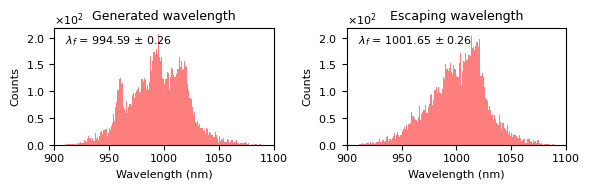

In [32]:
TITLE_FONT_SIZE = 9
LABEL_FONT_SIZE = 8
TICKS_FONT_SIZE = 8
TEXT_FONT_SIZE = 8

wl_min = 900
wl_max = 1100
fig1, ax1 = plt.subplots(1, 2, figsize=(6, 2))
ax1[0].set_title("Generated wavelength", fontsize=TITLE_FONT_SIZE)
ax1[0].hist(df["λgen"], range = (wl_min, wl_max), bins=wl_max - wl_min + 1,  color="red", alpha=0.5, label="generated")
ax1[1].set_title("Escaping wavelength", fontsize=TITLE_FONT_SIZE)
ax1[1].hist(df["λesc"], range = (900, 1100), bins=200,  color="red", alpha=0.5, label="escaped")
for a in ax1:
    a.set_xlabel("Wavelength (nm)", fontsize=LABEL_FONT_SIZE)
    a.set_ylabel("Counts", fontsize=LABEL_FONT_SIZE)
    a.set_xlim(wl_min, wl_max)
    a.tick_params(axis="both", which="major", labelsize=TICKS_FONT_SIZE)
    ymax = max(ax1[0].get_ylim()[1], ax1[1].get_ylim()[1])
    a.set_ylim(0, ymax)
    a.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    a.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    a.yaxis.offsetText.set_fontsize(TICKS_FONT_SIZE)
ax1[0].text(x=0.05, y=0.95, s=f"$\lambda_f$ = {mean_gen:.2f} $\pm$ {err_gen:.2f}", transform=ax1[0].transAxes, verticalalignment="top", fontsize=TEXT_FONT_SIZE)
ax1[1].text(x=0.05, y=0.95, s=f"$\lambda_f$ = {mean_esc:.2f} $\pm$ {err_esc:.2f}", transform=ax1[1].transAxes, verticalalignment="top", fontsize=TEXT_FONT_SIZE)
fig1.tight_layout()
plt.show()

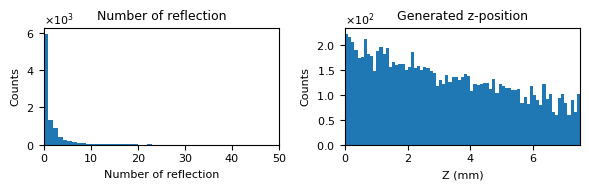

In [33]:
Nref_max = 50

fig2, ax2 = plt.subplots(1, 2, figsize=(6, 2))
ax2[0].hist(df["ref_N"], bins=np.arange(0, Nref_max + 1))
ax2[0].set_title("Number of reflection", fontsize=TITLE_FONT_SIZE)
ax2[0].set_xlabel("Number of reflection", fontsize=LABEL_FONT_SIZE)
ax2[0].set_ylabel("Counts", fontsize=LABEL_FONT_SIZE)
ax2[0].set_xlim(0, Nref_max)

ax2[1].hist(df["z0"], bins=np.arange(0, params["crystal"]["L"] + 0.1, 0.1))
ax2[1].set_title("Generated z-position", fontsize=TITLE_FONT_SIZE)
ax2[1].set_xlabel("Z (mm)", fontsize=LABEL_FONT_SIZE)
ax2[1].set_ylabel("Counts", fontsize=LABEL_FONT_SIZE)
if params["crystal"]["shape"] == "cuboid":
    ax2[1].set_xlim(0, params["crystal"]["L"])
elif params["crystal"]["shape"] == "brewster":
    ax2[1].set_xlim(0, params["crystal"]["L"]*1.1)

for a in ax2:
    a.tick_params(axis="both", which="major", labelsize=TICKS_FONT_SIZE)
    a.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    a.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    a.yaxis.offsetText.set_fontsize(TICKS_FONT_SIZE)

fig2.tight_layout()
plt.show()

## 3D visualization

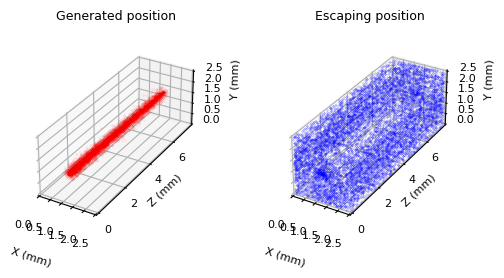

In [34]:
W = params["crystal"]["W"]
H = params["crystal"]["H"]
L = params["crystal"]["L"]

if df.shape[0] > 20000:
    df = df.iloc[:20000]

fig3 = plt.figure(figsize=(6, 3))
ax3_1 = fig3.add_subplot(121, projection="3d")
ax3_2 = fig3.add_subplot(122, projection="3d")
# fig3.subplots_adjust(left=0.05, bottom=0.15, right=0.8, top=0.9, wspace=0.0)

ax3_1.set_title("Generated position", fontsize=TITLE_FONT_SIZE)
ax3_2.set_title("Escaping position", fontsize=TITLE_FONT_SIZE)
ax3_1.plot(xs=df.x0, ys=df.z0, zs=df.y0, ls="None", marker=".", markersize=0.2, alpha=0.5, color="red")
ax3_2.plot(xs=df.x, ys=df.z, zs=df.y, ls="None", marker=".", markersize=0.5, alpha=0.5, color="blue")
ratio_y = H / W
ratio_z = L / W

for ax in [ax3_1, ax3_2]:
    ax.set_xlim(0, W)
    if params["crystal"]["shape"] == "cuboid":
        ax.set_ylim(0, L)
    elif params["crystal"]["shape"] == "brewster":
        ax.set_ylim(0, L*1.25)
    ax.set_zlim(0, H)
    ax.set_xlabel("X (mm)", fontsize=LABEL_FONT_SIZE)
    ax.set_ylabel("Z (mm)", fontsize=LABEL_FONT_SIZE)
    ax.set_zlabel("Y (mm)", fontsize=LABEL_FONT_SIZE)
    ax.tick_params(axis="both", which="major", labelsize=TICKS_FONT_SIZE)
    # ax.set_aspect("equal")

ax3_1.set_box_aspect((np.ptp(df.x), np.ptp(df.x * ratio_z), np.ptp(df.x * ratio_y)))
ax3_2.set_box_aspect((np.ptp(df.x), np.ptp(df.x * ratio_z), np.ptp(df.x * ratio_y)))
# fig3.tight_layout()
plt.show()

## generate report pdf

In [35]:
from io import BytesIO
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4, portrait
from reportlab.lib.units import mm
from reportlab.graphics import renderPDF
from svglib.svglib import svg2rlg

In [36]:
file = f"{path}/report.pdf"
paper = canvas.Canvas(file, pagesize=portrait(A4))

# timestamp
paper.setFont("Helvetica", 11)
paper.drawString(15 * mm, 280 * mm, f"{timestamp}")

# parameters
paper.setFont("Helvetica", 11)

# load parameters
step = params["simulation"]["step"]
Nref_max = params["simulation"]["max_ref_count"]
if Nref_max == 0:
    Nref_max = "Inf"
pump_depletion = params["simulation"]["pump_depletion"]

name = params["crystal"]["name"]
temperature = params["crystal"]["T"]
n1 = params["crystal"]["n1"]
n2 = params["crystal"]["n2"]
n3 = params["crystal"]["n3"]
cation_density = params["crystal"]["cation_density"]
doping_level = params["crystal"]["doping_level"]
correction_coeff = params["crystal"]["correction_coeff"]
W = params["crystal"]["W"]
H = params["crystal"]["H"]
L = params["crystal"]["L"]
shape = params["crystal"]["shape"]
angle = params["crystal"]["angle"]
caxis = params["crystal"]["caxis"]
baxis = params["crystal"]["baxis"]
QE = params["crystal"]["QE"]
alpha_b = params["crystal"]["alpha_b"]

dist = params["beam"]["distribution"]
d = params["beam"]["d"]
wl = params["beam"]["wl"]
k = params["beam"]["k"]
p0 = params["beam"]["p0"]
E = params["beam"]["E"]

paper.drawString(15 * mm, 270 * mm, f"Simulation: N={N}, step size={step} mm, max ref. count={Nref_max}, pump depletion={pump_depletion}")
paper.drawString(15 * mm, 260 * mm, "Crystal:")
paper.drawString(30 * mm, 260 * mm, f"{name}, {doping_level}% (x {cation_density} cm^-3 x {correction_coeff}) W={W}, H={H}, L={L} (mm), {temperature} K, {shape}, angle={angle}°,")
paper.drawString(30 * mm, 255 * mm, f"caxis={caxis}, baxis={baxis}, n1={n1}, n2={n2}, n3={n3},")
paper.drawString(30 * mm, 250 * mm, f"quantum efficiency={QE}, background absorption={alpha_b} cm^-1")
paper.drawString(15 * mm, 240 * mm, "Beam:")
paper.drawString(30 * mm, 240 * mm, f"{dist}, diameter={d} mm, wavelength={wl} nm, k-vector={k},")
paper.drawString(30 * mm, 235 * mm, f"p0={p0}, polarization={E}")

paper.drawString(50 * mm, 225 * mm, f"Escaping rays: {Nesc} / {N} => Escape efficiency={escape_eff * 100}%")
paper.drawString(50 * mm, 220 * mm, f"External quantum efficiency: {escape_eff * QE * 100}%")

imgdata1 = BytesIO()
fig1.savefig(imgdata1, format="svg")
imgdata1.seek(0)
imgdata2 = BytesIO()
fig2.savefig(imgdata2, format="svg")
imgdata2.seek(0)
imgdata3 = BytesIO()
fig3.savefig(imgdata3, format="svg")
imgdata3.seek(0)

drawing1=svg2rlg(imgdata1)
drawing2=svg2rlg(imgdata2)
drawing3=svg2rlg(imgdata3)

renderPDF.draw(drawing1, paper, 10 * mm, 155 * mm)
renderPDF.draw(drawing2, paper, 10 * mm, 95 * mm)
renderPDF.draw(drawing3, paper, 10 * mm, 0 * mm)

paper.save()